In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
% matplotlib inline
import os
import pickle
import joblib

## Dataset (Wines.csv)

In [3]:
df_wines = pd.read_csv("../../datasource/datasets/Wines.csv")
df_wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [4]:
df_wines.shape

(1143, 13)

### Exploration

In [5]:
df_wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [6]:
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [7]:
df_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


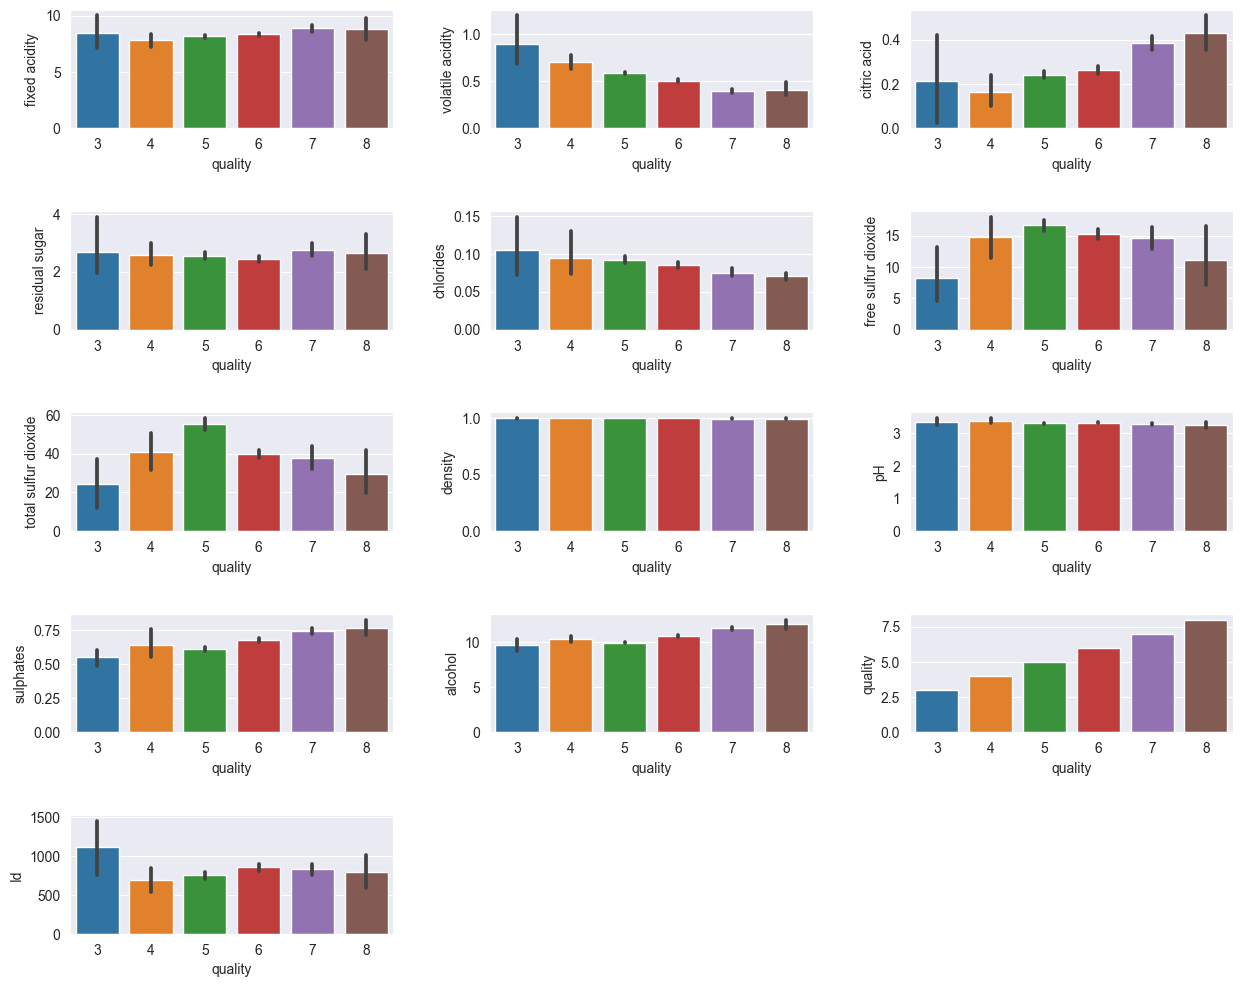

In [8]:
# define subplot grid
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.7, wspace=0.3)

for i, col_name in enumerate(df_wines.columns):
    ax = plt.subplot(5, 3, i + 1)
    sns.barplot(x='quality', y=col_name, data=df_wines)

plt.show()

#### Correlation

<AxesSubplot: >

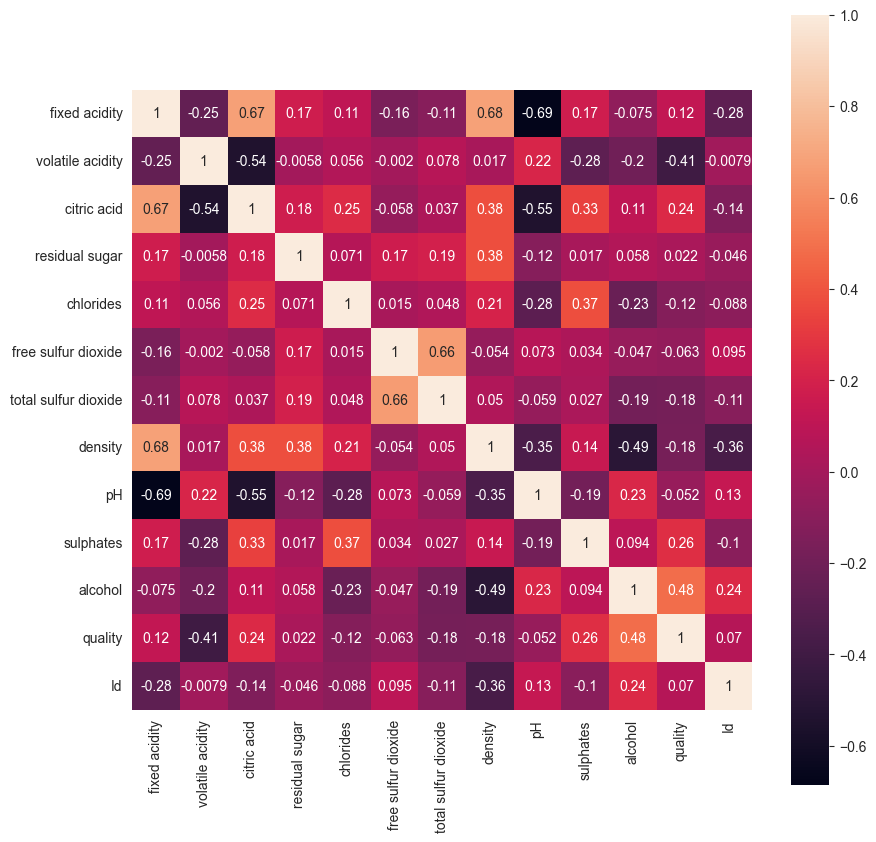

In [9]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 10))
sns.heatmap(df_wines.corr(), square=True, annot=True)

In [10]:
# Finding correlation between attributes and quality
target = 'quality'
df_wines.corr()[target].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64

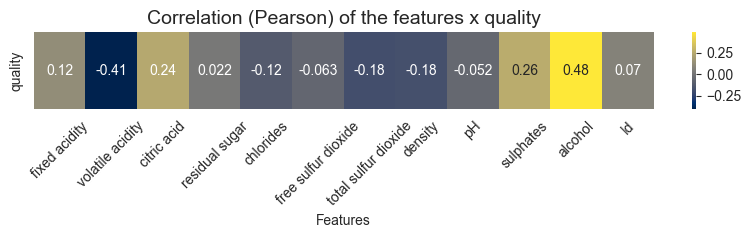

In [11]:
fig, ax = plt.subplots(figsize=(10, 1))

data = df_wines.corr().loc[[target], :].drop(target, axis=1)
sns.heatmap(data=data, cmap='cividis', annot=True, ax=ax)
ax.set_title(f'Correlation (Pearson) of the features x {target}', fontsize=14)
ax.set_xlabel(f'Features')
ax.tick_params(axis='x', labelrotation=45)

plt.show()

<AxesSubplot: xlabel='alcohol', ylabel='Count'>

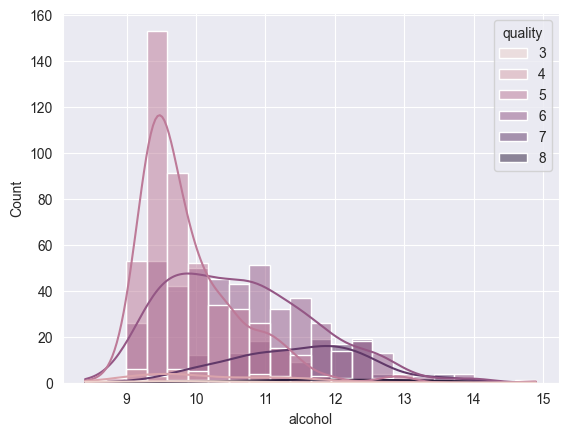

In [12]:
sns.histplot(x='alcohol', data=df_wines, kde=True, hue="quality")

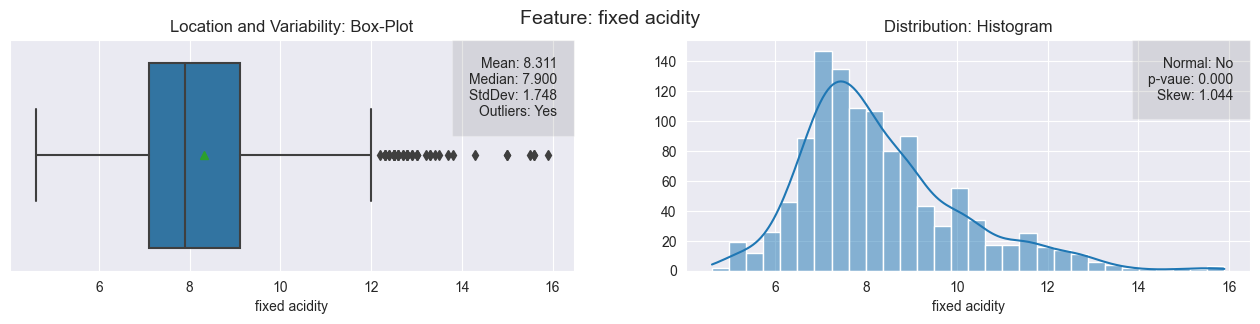

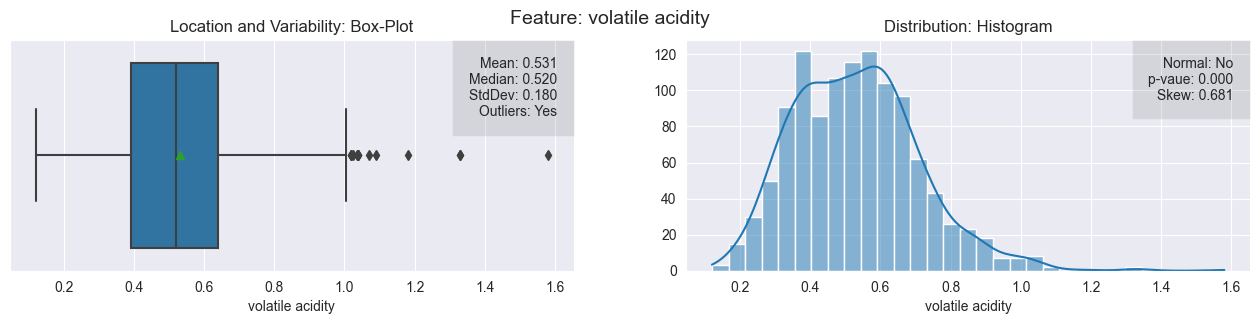

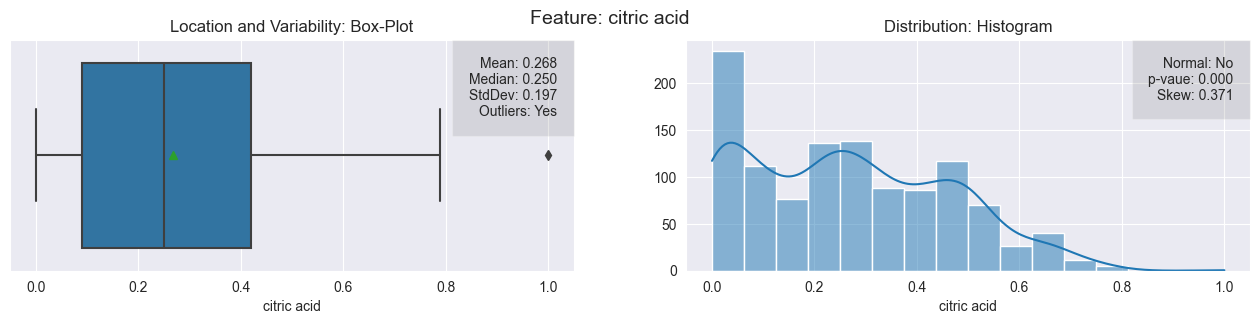

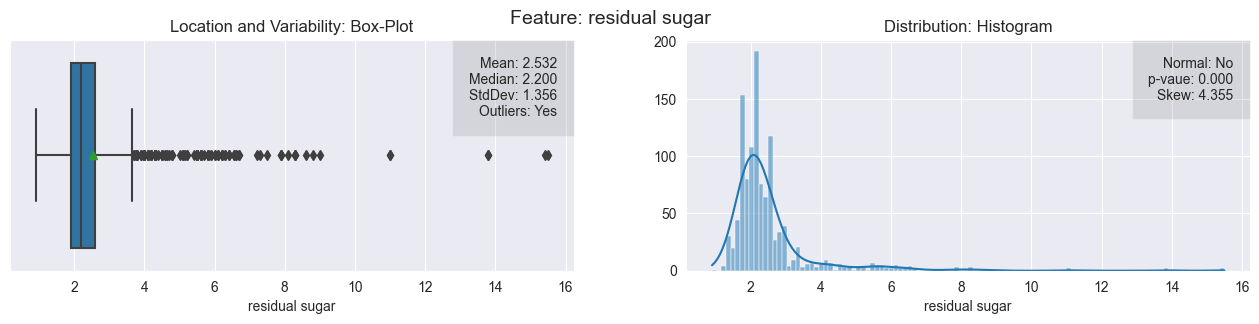

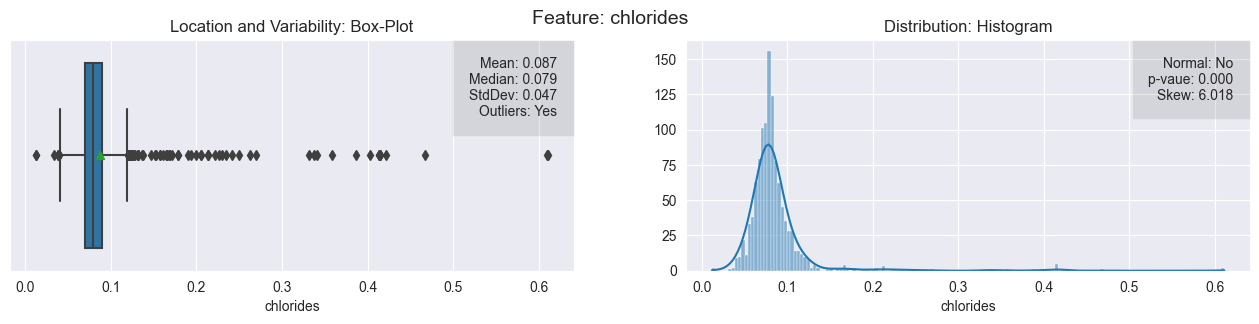

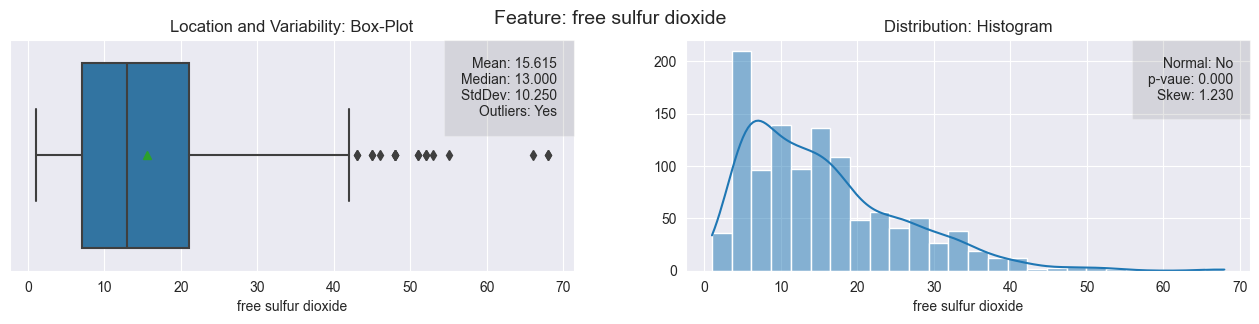

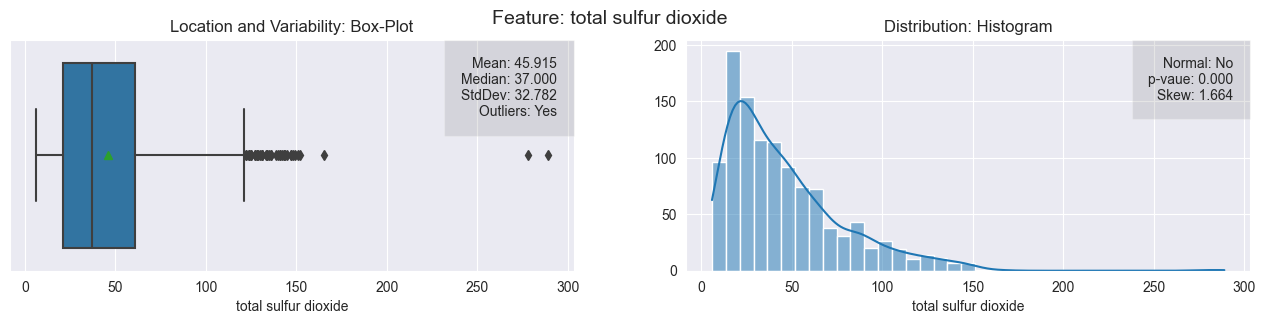

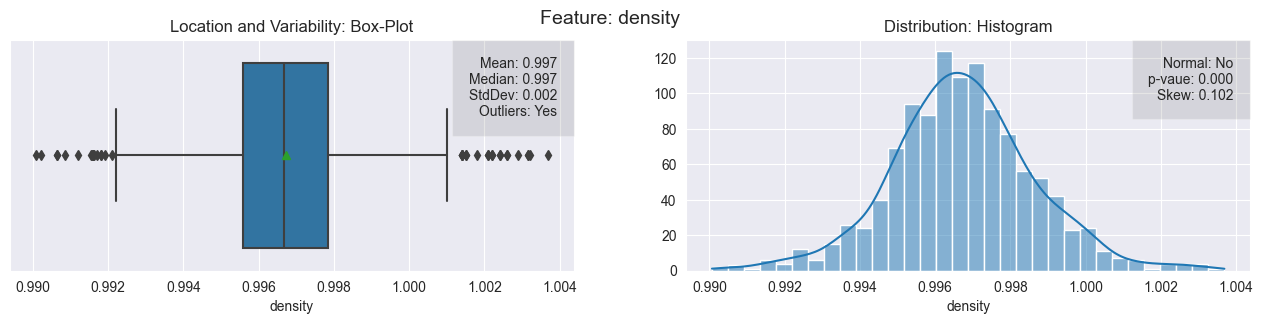

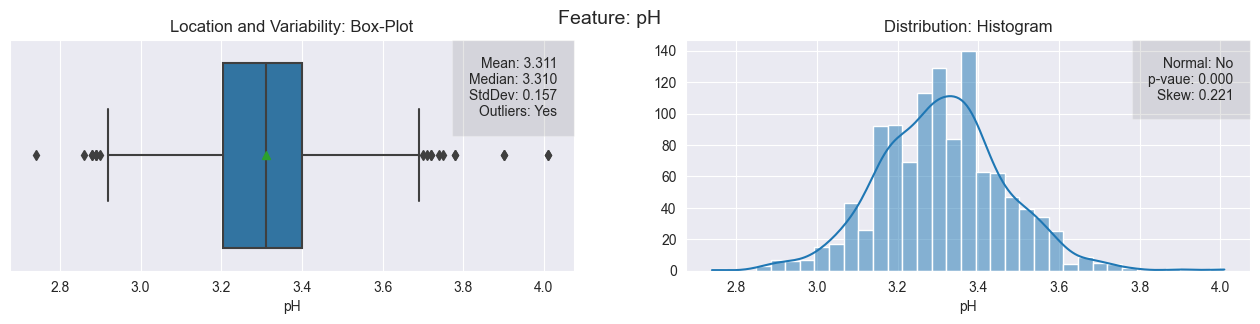

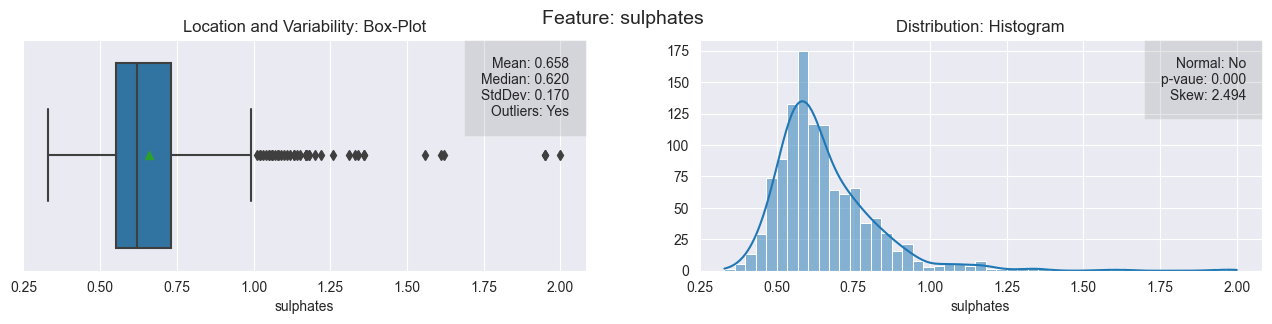

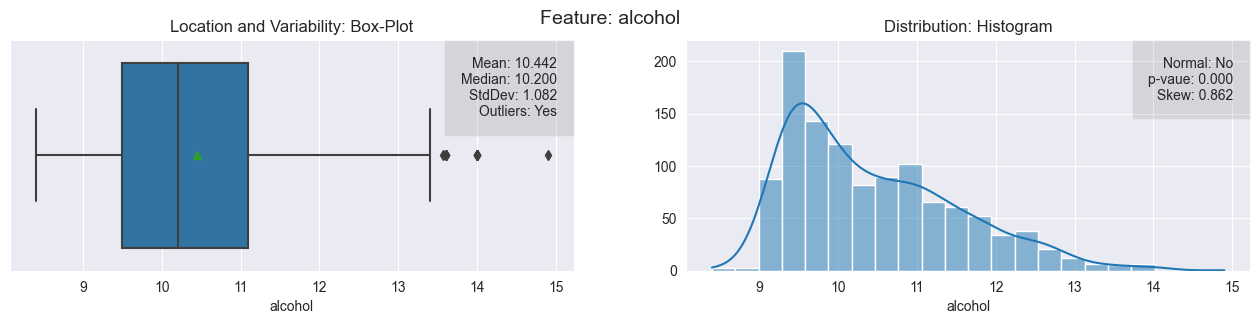

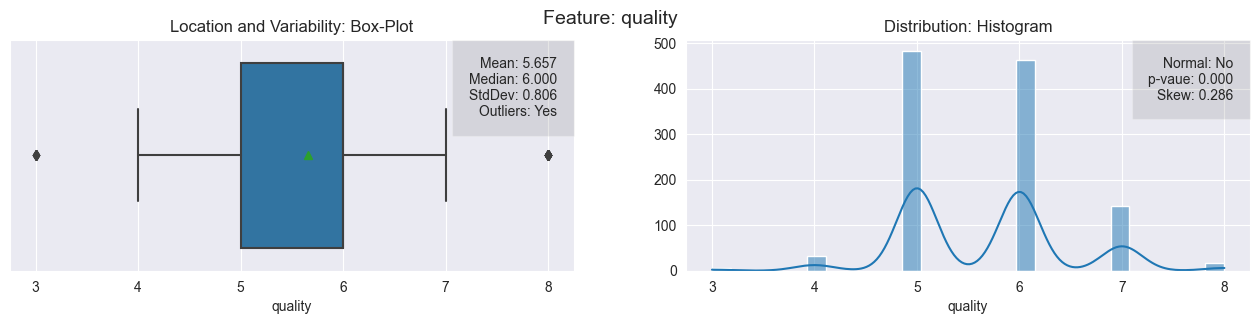

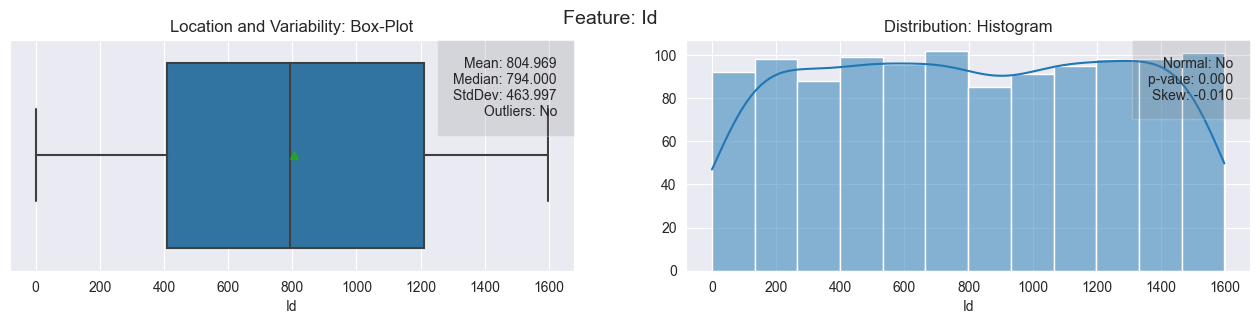

In [13]:
from scipy.stats import normaltest, skew


def explore_features(df, features, alpha=0.05):
    """ """
    for feature in features:
        fig, ax = plt.subplots(ncols=2, figsize=(16, 3))
        fig.suptitle(f'Feature: {feature}', fontsize=14)

        # Boxplot
        sns.boxplot(data=df, x=feature, ax=ax[0], showmeans=True)
        ax[0].set_title('Location and Variability: Box-Plot')

        # Checking for outliers
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        outliers = (df[feature][(Q1 - 1.5 * IQR >= df[feature])
                                | (df[feature] >= Q3 + 1.5 * IQR)])
        if outliers.empty:
            has_outliers = 'No'
        else:
            has_outliers = 'Yes'

        # Presenting the stats
        ax[0].annotate(text=f'Mean: {df[feature].mean():.3f}\n'
                            f'Median: {df[feature].median():.3f}\n'
                            f'StdDev: {df[feature].std():.3f}\n'
                            f'Outliers: {has_outliers}',
                       xy=(1, 1), xytext=(-12, -12),
                       xycoords='axes fraction', textcoords='offset points',
                       ha='right', va='top',
                       bbox=dict(facecolor='grey', alpha=0.2, pad=12))

        # Histogram
        sns.histplot(data=df, x=feature, ax=ax[1], kde=True)
        ax[1].set_title('Distribution: Histogram')
        ax[1].yaxis.label.set_visible(False)

        # Normality stats
        _, pvalue = normaltest(df[feature])
        skewness = skew(df[feature])

        # Normality test
        if pvalue < alpha:
            normal = 'No'
        else:
            normal = 'Yes'

        # Presenting the stats
        ax[1].annotate(text=f'Normal: {normal}\n'
                            f'p-vaue: {pvalue:.3f}\n'
                            f'Skew: {skewness:.3f}',
                       xy=(1, 1), xytext=(-12, -12),
                       xycoords='axes fraction', textcoords='offset points',
                       ha='right', va='top',
                       bbox=dict(facecolor='grey', alpha=0.2, pad=12))

        plt.show()


explore_features(df_wines, df_wines.columns)

### Cleaning

In [14]:
df_wines.drop("Id", axis=1, inplace=True)
df_wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Preprocessing

In [15]:
X_train = df_wines.drop('quality', axis=1).values
y_train = df_wines['quality'].values

X_train

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.2  ,  0.6  ,  0.08 , ...,  3.45 ,  0.58 , 10.5  ],
       [ 5.9  ,  0.55 ,  0.1  , ...,  3.52 ,  0.76 , 11.2  ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ]])

In [16]:
my_pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())
])

X_train = my_pipeline.fit_transform(X_train)
X_train

array([[-0.52157961,  0.93933222, -1.36502663, ...,  1.27069495,
        -0.57365783, -0.96338181],
       [-0.29259344,  1.94181282, -1.36502663, ..., -0.70892755,
         0.1308811 , -0.59360107],
       [-0.29259344,  1.27349242, -1.16156762, ..., -0.32577481,
        -0.04525363, -0.59360107],
       ...,
       [-1.20853813,  0.38239855, -0.9581086 , ...,  0.88754221,
        -0.45623467,  0.05351522],
       [-1.38027776,  0.10393172, -0.8563791 , ...,  1.33455374,
         0.60057372,  0.70063152],
       [-1.38027776,  0.6330187 , -0.75464959, ...,  1.65384769,
         0.30701583, -0.22382033]])

In [17]:
my_pipeline.fit_transform(df_wines)

array([[-0.52157961,  0.93933222, -1.36502663, ..., -0.57365783,
        -0.96338181, -0.81572437],
       [-0.29259344,  1.94181282, -1.36502663, ...,  0.1308811 ,
        -0.59360107, -0.81572437],
       [-0.29259344,  1.27349242, -1.16156762, ..., -0.04525363,
        -0.59360107, -0.81572437],
       ...,
       [-1.20853813,  0.38239855, -0.9581086 , ..., -0.45623467,
         0.05351522, -0.81572437],
       [-1.38027776,  0.10393172, -0.8563791 , ...,  0.60057372,
         0.70063152,  0.42578423],
       [-1.38027776,  0.6330187 , -0.75464959, ...,  0.30701583,
        -0.22382033, -0.81572437]])

### Split train test

In [18]:
a, b = train_test_split(df_wines, test_size=0.2, random_state=0)

a

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1050,6.1,0.60,0.08,1.80,0.071,14.0,45.0,0.99336,3.38,0.54,11.0,5
175,10.8,0.32,0.44,1.60,0.063,16.0,37.0,0.99850,3.22,0.78,10.0,6
198,8.9,0.40,0.32,5.60,0.087,10.0,47.0,0.99910,3.38,0.77,10.5,7
535,8.3,0.65,0.10,2.90,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,5
81,9.4,0.40,0.31,2.20,0.090,13.0,62.0,0.99660,3.07,0.63,10.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1033,6.6,0.58,0.02,2.00,0.062,37.0,53.0,0.99374,3.35,0.76,11.6,7
763,8.7,0.42,0.45,2.40,0.072,32.0,59.0,0.99617,3.33,0.77,12.0,6
835,9.8,0.39,0.43,1.65,0.068,5.0,11.0,0.99478,3.19,0.46,11.4,5
559,7.1,0.52,0.03,2.60,0.076,21.0,92.0,0.99745,3.50,0.60,9.8,5


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(914, 11)
(914,)
(229, 11)
(229,)


## Model 1 : Linear regression

In [20]:
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [21]:
# Importing important libraries
import pyforest
import lazypredict
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix

# Scikit-learn packages
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [22]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()  # create model
model_lr

LinearRegression()

### Training

In [23]:
model_lr.fit(X_train, y_train)
"R-squared:", model_lr.score(X_train, y_train)

('R-squared:', 0.36178672228010067)

In [24]:

scores = cross_val_score(model_lr, X_train, y_train, scoring="neg_mean_squared_error", cv=10)  # evaluate model
rmse_scores = np.sqrt(-scores)


def print_scores_of_validation(scores):
    print("> Scores :", scores)
    print("> Mean :", scores.mean())
    print("> Standard deviation:", scores.std())


print_scores_of_validation(rmse_scores)

> Scores : [0.61922272 0.63759915 0.72090483 0.60231062 0.64693497 0.69307959
 0.67604727 0.6777323  0.68789084 0.60882209]
> Mean : 0.6570544397719973
> Standard deviation: 0.03788042407398939


### Evaluation

In [25]:
y_predict_lr = model_lr.predict(X_test)

In [26]:
lr_mse = mean_squared_error(y_test, y_predict_lr)
lr_rmse = np.sqrt(lr_mse)
print("Mean Squared Error: " + str(lr_rmse))

Mean Squared Error: 0.6007284506737955


### Save

In [27]:
def save_model(model, filename, output_dir):
    where = f'{os.path.join(output_dir, filename)}.pkl'
    joblib.dump(model, where)
    print(f"-> saved at {where}")
    return where


save_model(model_lr, "LinearRegression".lower(), "models")

FileNotFoundError: [Errno 2] No such file or directory: 'models\\linearregression.pkl'

In [ ]:
# load
def load_model(model_filepath):
    model = joblib.load(model_filepath)
    return model


load_model(r"models\\linearregression.pkl")

## Model 2 : Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

model_rfr = RandomForestRegressor()
model_etr = ExtraTreesRegressor()
model_rfr.get_params(), model_etr.get_params()

({'bootstrap': True,
  'ccp_alpha': 0.0,
  'criterion': 'squared_error',
  'max_depth': None,
  'max_features': 1.0,
  'max_leaf_nodes': None,
  'max_samples': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'n_estimators': 100,
  'n_jobs': None,
  'oob_score': False,
  'random_state': None,
  'verbose': 0,
  'warm_start': False},
 {'bootstrap': False,
  'ccp_alpha': 0.0,
  'criterion': 'squared_error',
  'max_depth': None,
  'max_features': 1.0,
  'max_leaf_nodes': None,
  'max_samples': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'n_estimators': 100,
  'n_jobs': None,
  'oob_score': False,
  'random_state': None,
  'verbose': 0,
  'warm_start': False})

In [31]:
model_rfr.fit(X_train, y_train)
print("rfr R-squared:", model_rfr.score(X_train, y_train))
model_etr.fit(X_train, y_train)
print("etr R-squared:", model_etr.score(X_train, y_train))

rfr R-squared: 0.9235527820013822
etr R-squared: 1.0


### Evaluation

In [32]:
X_test[0]

array([ 0.45161162,  1.35703247, -0.24600206, -0.24507216, -0.1678983 ,
       -0.35286797,  0.06363878,  0.45191642, -0.83664513, -0.86721572,
       -0.77849144])

In [34]:
p0 = model_rfr.predict([X_test[0]])
p0

array([5.05])

In [35]:
y_test[0]

5

In [36]:
np.array([0.45
    , 1.36
    , -0.25
    , -0.25
    , -0.17
    , -0.35
    , 0.06
    , 0.45
    , -0.84
    , -0.87]) *

array([ 0.45,  1.36, -0.25, -0.25, -0.17, -0.35,  0.06,  0.45, -0.84,
       -0.87])

In [134]:
y_predict_rfr = model_rfr.predict(X_test)
mse_rfr = mean_squared_error(y_test, y_predict_rfr)
rmse_rfr = np.sqrt(mse_rfr)
print("Mean Squared Error: " + str(rmse_rfr))

Mean Squared Error: 0.5779715319140354


In [135]:
y_predict_etr = model_etr.predict(X_test)
mse_etr = mean_squared_error(y_test, y_predict_etr)
rmse_etr = np.sqrt(mse_etr)
print("Mean Squared Error: " + str(rmse_etr))

Mean Squared Error: 0.5628099340221894


### Save

In [137]:
save_model(model_rfr, "RandomForestRegressor".lower(), "models")
save_model(model_etr, "ExtraTreesRegressor".lower(), "models")

-> saved at models\randomforestregressor.pkl
-> saved at models\ExtraTreesRegressor.pkl


'models\\ExtraTreesRegressor.pkl'

## Lazy Predict

In [98]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:31<00:00,  1.34it/s]


In [104]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.44,0.47,0.57,0.25
RandomForestRegressor,0.42,0.45,0.58,0.74
SGDRegressor,0.38,0.41,0.60,0.01
LGBMRegressor,0.38,0.41,0.60,0.15
RidgeCV,0.38,0.41,0.60,0.01
Ridge,0.38,0.41,0.60,0.01
Lars,0.38,0.41,0.60,0.01
TransformedTargetRegressor,0.38,0.41,0.60,0.01
LinearRegression,0.38,0.41,0.60,0.02


In [107]:
predictions
predictions.index[0:3]

Index(['ExtraTreesRegressor', 'RandomForestRegressor', 'SGDRegressor'], dtype='object', name='Model')